<a href="https://colab.research.google.com/github/Sid-Oya/DS-Unit-1-Sprint-2-Statistics/blob/master/Sidoney_Daley__DS_Unit_1_Sprint_Challenge_2_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [ ]:
# TODO
import numpy as np
import pandas as pd

In [ ]:
column_headers = ['A1', 'A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
credit_app = pd.read_csv(url, header=None, names=column_headers)
credit_app.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
credit_app.shape

(690, 16)

In [ ]:
credit_app.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [ ]:
credit_app.replace(to_replace ="?", 
                 value =np.nan)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [ ]:
credit_app.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [ ]:
credit_app = credit_app.astype({'A11':'float64','A15':'float64'})

In [ ]:
credit_app.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14     object
A15    float64
A16     object
dtype: object

In [ ]:
credit_app['A2'] = pd.to_numeric(credit_app['A2'],errors='coerce')

In [ ]:
credit_app.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14     object
A15    float64
A16     object
dtype: object

In [ ]:
credit_app['A14'] = pd.to_numeric(credit_app['A14'],errors='coerce')

In [ ]:
credit_app.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [ ]:
# TODO
credit_app.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [ ]:
credit_app['A16'].value_counts()

-    383
+    307
Name: A16, dtype: int64

In [ ]:
credit_app.replace(to_replace ="-",
                 value =0, inplace=True)

In [ ]:
credit_app.replace(to_replace ="+",
                 value =1, inplace=True)

In [ ]:
credit_app.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,1


In [ ]:
neg = credit_app[credit_app['A16']==0]

neg.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
70,b,32.33,7.5,u,g,e,bb,1.585,t,f,0.0,t,s,420.0,0.0,0
71,b,34.83,4.0,u,g,d,bb,12.500,t,f,0.0,t,g,NaN,0.0,0
72,a,38.58,5.0,u,g,cc,v,13.500,t,f,0.0,t,g,980.0,0.0,0
73,b,44.25,0.5,u,g,m,v,10.750,t,f,0.0,f,s,400.0,0.0,0
74,b,44.83,7.0,y,p,c,v,1.625,f,f,0.0,f,g,160.0,2.0,0


In [ ]:
pos = credit_app[credit_app['A16']==1]

pos.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,1


In [ ]:
credit_app['A3'].describe()

count    690.000000
mean       4.758725
std        4.978163
min        0.000000
25%        1.000000
50%        2.750000
75%        7.207500
max       28.000000
Name: A3, dtype: float64

In [ ]:
print(pos['A3'].mean())
print(neg['A3'].mean())
print(credit_app['A3'].mean())

5.904951140065144
3.839947780678851
4.7587246376811585


In [ ]:
from scipy.stats import ttest_ind

In [ ]:
ttest_ind(pos['A3'], neg['A3'], nan_policy='omit')

Ttest_indResult(statistic=5.52998337614816, pvalue=4.551680702308068e-08)

In [ ]:
credit_app['A14'].describe()

count     677.000000
mean      184.014771
std       173.806768
min         0.000000
25%        75.000000
50%       160.000000
75%       276.000000
max      2000.000000
Name: A14, dtype: float64

In [ ]:
print(pos['A14'].mean())
print(neg['A14'].mean())
print(credit_app['A14'].mean())

164.421926910299
199.6994680851064
184.01477104874445


In [ ]:
ttest_ind(pos['A14'], neg['A14'], nan_policy='omit')

Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare 
from scipy.stats import normaltest

In [ ]:
def confidence_interval(data, confidence=0.95):
    """
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 

    Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval

    Returns:
    tuple of (mean, lower bound, upper bound)
    """
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)
    stderr = np.std(data, ddof=1)/np.sqrt(n)
    moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1) # just looking up the corresponding t-stat.
    return (mean, mean - moe, mean + moe)

In [ ]:
credit_app['A3'].mean()


4.7587246376811585

In [ ]:
conf_int=stats.t.interval(0.95, 
                          credit_app.shape[0],
                          loc = credit_app['A3'].mean(),
                          scale = stats.sem(credit_app['A3'])
                          )
conf_int

(4.3866285155010685, 5.1308207598612485)

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


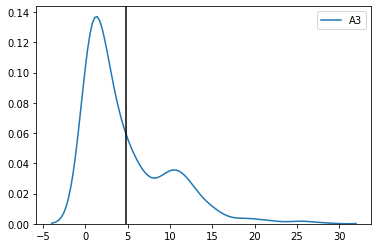

In [ ]:
sns.kdeplot(credit_app['A3'])
plt.axvline(x=conf_int[0], color='red')
plt.axvline(x=conf_int[1], color='red')
plt.axvline(x=credit_app['A3'].mean(), color='k');

In [ ]:
credit_app['A14'].value_counts(dropna=False).head()

0.0      132
120.0     35
200.0     35
160.0     34
100.0     30
Name: A14, dtype: int64

In [ ]:
credit_app['A14'].mean()

184.01477104874445

In [ ]:
conf_int=stats.t.interval(0.95, 
                          credit_app.shape[0],
                          loc = credit_app['A14'].mean(),
                          scale = stats.sem(credit_app['A14'])
                          )
conf_int

(nan, nan)

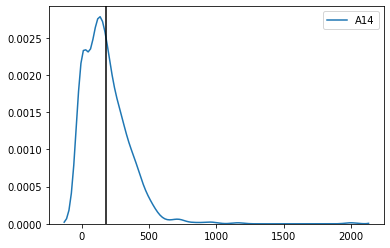

In [ ]:
sns.kdeplot(credit_app['A14'])
plt.axvline(x=conf_int[0], color='red')
plt.axvline(x=conf_int[1], color='red')
plt.axvline(x=credit_app['A14'].mean(), color='k');

In [ ]:
cut_points = [-1, 0, 1,]
label_names = ['neg', 'pos',]
credit_app['credit_class'] = pd.cut(credit_app['A16'], cut_points, labels=label_names)

credit_app.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,credit_class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,1,pos
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,1,pos
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,1,pos
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,1,pos
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,1,pos


In [ ]:
credit_app.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,credit_class
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0.0,f,g,260.0,0.0,0,neg
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2.0,t,g,200.0,394.0,0,neg
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1.0,t,g,200.0,1.0,0,neg
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0.0,f,g,280.0,750.0,0,neg
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0.0,t,g,0.0,0.0,0,neg


In [ ]:
credit_app['A9'].value_counts()

t    361
f    329
Name: A9, dtype: int64

In [ ]:
credit_app['credit_class'].value_counts()

neg    383
pos    307
Name: credit_class, dtype: int64

In [ ]:
credit_app = credit_app.sort_values(by='credit_class', ascending=True)

credit_app.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,credit_class
344,b,38.92,1.750,u,g,k,v,0.500,f,f,0.0,t,g,300.0,2.0,0,neg
398,b,26.17,12.500,y,p,k,h,1.250,f,f,0.0,t,g,0.0,17.0,0,neg
399,b,31.00,2.085,u,g,c,v,0.085,f,f,0.0,f,g,300.0,0.0,0,neg
400,b,20.75,5.085,y,p,j,v,0.290,f,f,0.0,f,g,140.0,184.0,0,neg
401,b,28.92,0.375,u,g,c,v,0.290,f,f,0.0,f,g,220.0,140.0,0,neg


In [ ]:
contingency_table = pd.crosstab(credit_app['A9'], credit_app['credit_class'], margins=True)

contingency_table

credit_class,neg,pos,All
A9,,,
f,306,23,329
t,77,284,361
All,383,307,690


In [ ]:
row_sums = contingency_table.iloc[0:2, 2].values
col_sums = contingency_table.iloc[2, 0:2].values

print(row_sums)
print(col_sums)

[329 361]
[383 307]


In [ ]:
total = contingency_table.loc['All','All']
total

690

In [ ]:
expected = []
for i in range(len(row_sums)):
    expected_row = []
    for column in col_sums:
        expected_val = column*row_sums[i]/total
        expected_row.append(expected_val)
    expected.append(expected_row)
    
expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 2)
[[182.61884058 146.38115942]
 [200.38115942 160.61884058]]


In [ ]:
observed = pd.crosstab(credit_app['A9'], credit_app['credit_class']).values
print(observed.shape)
observed

(2, 2)


array([[306,  23],
       [ 77, 284]])

In [ ]:
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 358.1003264716328


In [ ]:
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}")  

Degrees of Freedom: 1


In [ ]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 355.2038167412799
P-value: 3.1185900878457007e-79
Degrees of Freedom: 1
Expected: 
 [[182.61884058 146.38115942]
 [200.38115942 160.61884058]]


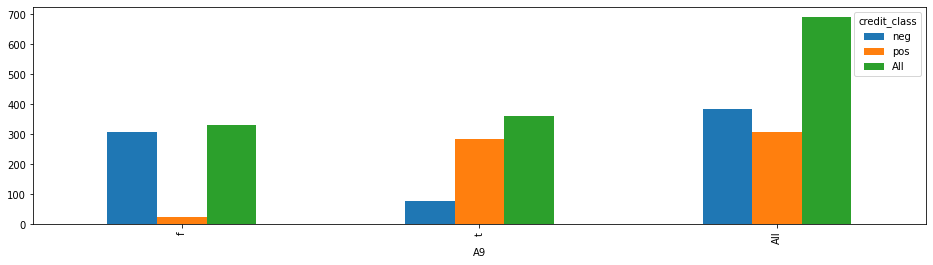

In [ ]:
contingency_table.plot(kind='bar', figsize=(16,4));

In [ ]:
contingency_table1 = pd.crosstab(credit_app['A13'], credit_app['credit_class'], margins=True)

contingency_table1

credit_class,neg,pos,All
A13,,,
g,338,287,625
p,3,5,8
s,42,15,57
All,383,307,690


In [ ]:
row_sums1 = contingency_table1.iloc[0:3, 2].values
col_sums1 = contingency_table1.iloc[3, 0:2].values

print(row_sums1)
print(col_sums1)

[625   8  57]
[383 307]


In [ ]:
total1 = contingency_table1.loc['All','All']
total1

690

In [ ]:
expected1 = []
for i in range(len(row_sums1)):
    expected_row1 = []
    for column in col_sums1:
        expected_val1 = column*row_sums1[i]/total1
        expected_row1.append(expected_val1)
    expected1.append(expected_row1)
    
expected1 = np.array(expected1)
print(expected1.shape)  
print(expected1)

(3, 2)
[[346.92028986 278.07971014]
 [  4.44057971   3.55942029]
 [ 31.63913043  25.36086957]]


In [ ]:
observed1 = pd.crosstab(credit_app['A13'], credit_app['credit_class']).values
print(observed1.shape)
observed1

(3, 2)


array([[338, 287],
       [  3,   5],
       [ 42,  15]])

In [ ]:
chi_squared1 = ((observed1 - expected1)**2/(expected1)).sum() 
print(f"Chi-Squared: {chi_squared1}")

Chi-Squared: 9.191570451545385


In [ ]:
dof1 = (len(row_sums1)-1)*(len(col_sums1)-1)
print(f"Degrees of Freedom1: {dof1}")  

Degrees of Freedom1: 2


In [ ]:
chi_squared1, p_value, dof1, expected1 = stats.chi2_contingency(observed1)

print(f"Chi-Squared1: {chi_squared1}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom1: {dof1}") 
print("Expected1: \n", np.array(expected1))

Chi-Squared1: 9.191570451545385
P-value: 0.010094291370456357
Degrees of Freedom1: 2
Expected1: 
 [[346.92028986 278.07971014]
 [  4.44057971   3.55942029]
 [ 31.63913043  25.36086957]]


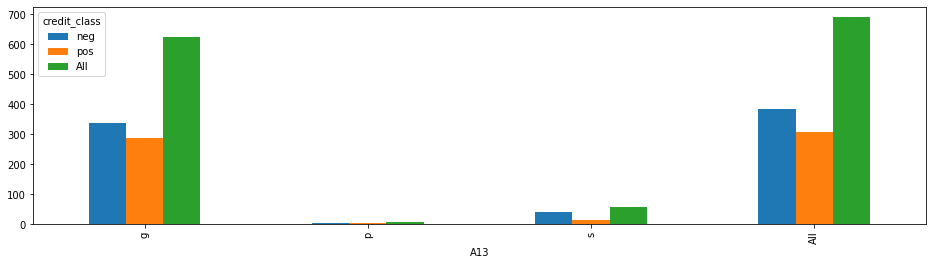

In [ ]:
contingency_table1.plot(kind='bar', figsize=(16,4));

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.


*  TTest 1 - Null Hypothesis - creditors in the negative class and creditors in the positive class will displace a vast difference in the 'A3' mean.
Results - I fail to reject the null hypothesis due to the vast difference in p value

*   TTest 2 -  Null Hypothesis - creditors in the negative class and creditors in the positive class will displace a difference in the 'A14' mean.
Results - I reject the null hypothesis due to the lack of significant difference in p value

*   Chi Test 1 - there is a correlation between the class labels and the 'A9' category

*   Chi Test 2 - there is a corelation between the class labels and the 'A13' category

*   Working with this data set and not knowing what the heading meant and the what the values stood for was quite challenging.





## Part 4 - Bayesian vs Frequentist Statistics

Using a minimum of 2-3 sentences, give an explanation of Bayesian and Frequentist statistics, and then compare and contrast these two approaches to statistical inference.




*   Bayesian Statistics takes into consideration prior belief on an event in order to express the probability of the event occurances.

*   Frequentist Statistics takes a more fixed approach to determine the probablity of event occurances




# Stretch Goals: 
Do these to get a 3. These are not required in order to pass the Sprint Challenge.

## Part 1: 

Make sure that all of your dataframe columns have the appropriate data types. *Hint:* If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function. In order to get a 3 on this section make sure that your data exploration is particularly well commented, easy to follow, and thorough.

## Part 2:

Write functions that can calculate t-tests and chi^2 tests on all of the appropriate column combinations from the dataset. (Remember that certain tests require certain variable types.)

## Part 3: 

Calculate and report confidence intervals on your most important mean estimates (choose at least two). Make some kind of a graphic or visualization to help us see visually how precise these estimates are.

## Part 4:

Give an extra awesome explanation of Bayesian vs Frequentist Statistics. Maybe use code or visualizations, or any other means necessary to show an above average grasp of these high level concepts.

In [ ]:
# You can work the stretch goals down here or back up in their regular sections
# just make sure that they are labeled so that we can easily differentiate
# your main work from the stretch goals.